# Exercise 04: Visualizing Data With Python

Name: Karli Dean\
Date: 02/03/2026

## Question 2:

Using **Jupyter Notebooks**, you must use the `create_engine` command to connect to your database.

After the `create_engine` command is executed, **what are the three statements required to execute the query from Question 1 and display the results in the notebook**?

Importing all Packages

In [29]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
print("All packages were loaded.")


All packages were loaded.


Creating an Engine to the PostGres Database

In [30]:
user = "postgres"
password = "RankCastle529!"
host = "localhost"
port = 5432
db = "world"

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}")


Using a SEELCT function in Jupyter from this df

In [31]:
sql = """
SELECT
    c.name AS country,
    COUNT(*) AS official_language_count
FROM country c
JOIN countrylanguage cl
    ON cl.countrycode = c.code
WHERE cl.isofficial = 'T'
GROUP BY c.name
HAVING COUNT(*) > 2
ORDER BY official_language_count DESC, c.name;
"""

df = pd.read_sql_query(sql, engine)

df


,country,official_language_count
0,South Africa ...,4
1,Switzerland ...,4
2,Belgium ...,3
3,Bolivia ...,3
4,Luxembourg ...,3
5,Peru ...,3
6,Singapore ...,3
7,Vanuatu ...,3


## Question 3:

C:\Users\karli\AppData\Local\Temp\ipykernel_14580\1399074195.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


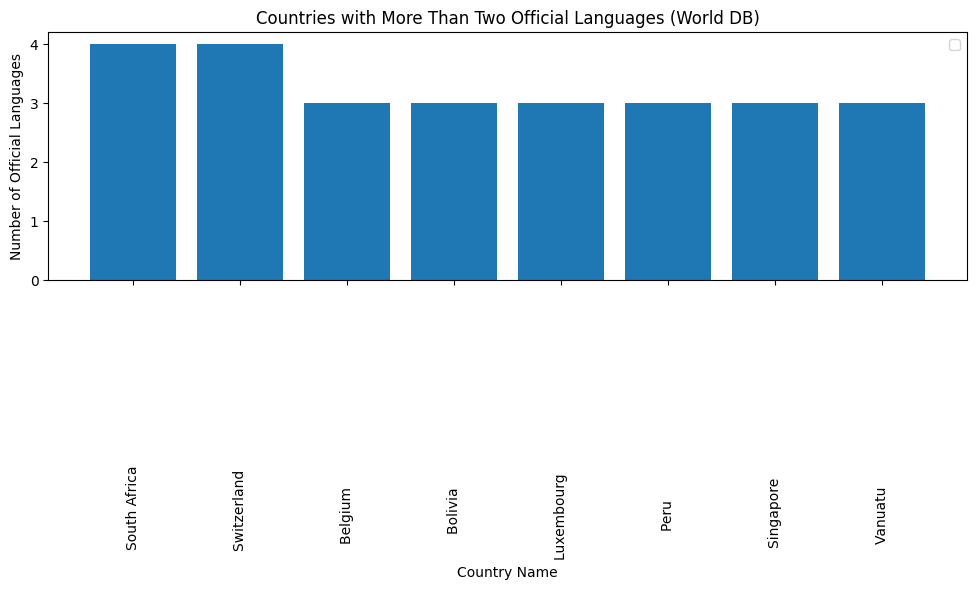

In [37]:
# Graph Sizing
plt.figure(figsize=(10, 6))

# Graph Labeling
plt.bar(df["country"], df["official_language_count"])
plt.xlabel("Country Name")
plt.ylabel("Number of Official Languages")
plt.title("Countries with More Than Two Official Languages (World DB)")
plt.xticks(rotation=90)
plt.legend()

# Graph Spacing
plt.tight_layout()

# Show the Graph
plt.show()
